<module 'matplotlib.pyplot' from 'C:\\Users\\VICHET\\AppData\\Roaming\\Python\\Python310\\site-packages\\matplotlib\\pyplot.py'>

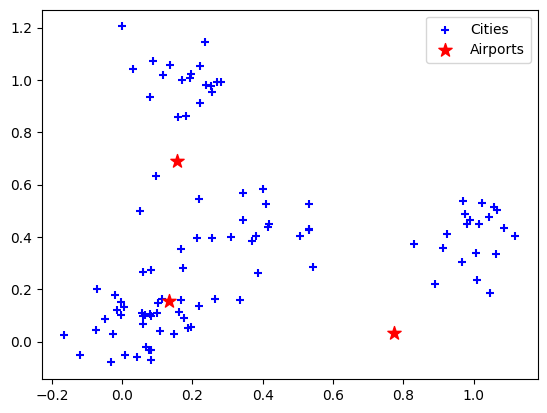

In [2]:
import random
import numpy as np

num_city = 100
num_air = 3
num_center = 5
sigma = 0.1
cities = set()
airports = []

for i in range(num_center):
    x = random.random()
    y = random.random()
    xc = np.random.normal(x, sigma, num_city//num_center)
    yc = np.random.normal(y, sigma, num_city//num_center)
    cities = cities.union(zip(xc, yc))


for i in range(num_air):
    x = random.random()
    y = random.random()
    airports.append((x,y))

import matplotlib.pyplot as plt

zip_cities = zip(*cities)
plt.scatter(*zip_cities, marker='+',color='b', label='Cities')
zip_airs = zip(*airports)
plt.scatter(*zip_airs, marker='*', color='r', s=100, label='Airports')
plt.legend()
plt




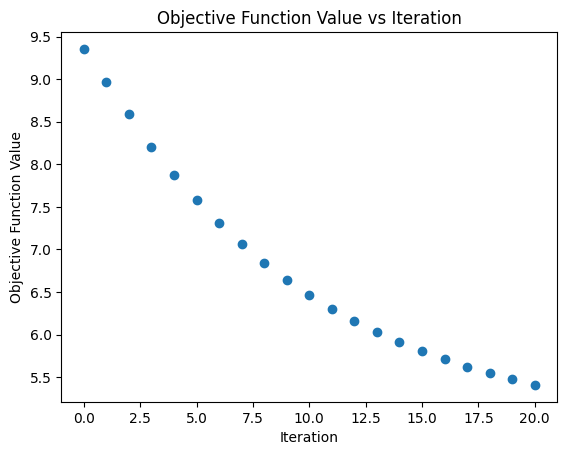

In [3]:
#returns an list of the closest cities for each airport
def closest(airports,cities):
  closest = []
  #creates an list of of empty lists
  for x in range(len(airports)):
    closest.append([])
  for city in cities:
    #temp list to store distance
    temp = []
    #appends distance between each airport to temp list
    for airport in airports:
      #distance formula between two points d = √(x2 - x1)2 + (y2 - y1)2
      temp.append(np.sqrt(np.sum(np.square(np.array(airport) - np.array(city)))))
    #appends the min distance to list of closest cities for each airport
    closest[temp.index(min(temp))].append(city)
  return closest

#objective function, returns total distance
def objectiveFunction(airports,closest):
  objective = 0
  #loops through list of cities closest to each airport and sum up the distance
  for index, airport in enumerate(closest):
    for city in airport:
      #f (x1, y1, x2, y2, x3, y3) = n∑i=1 X ∑c∈Ci (xi − xc)^2 + (yi − yc)^2
      objective += np.sum(np.square(np.array(airports[index]) - np.array(city)))
  return objective

#gradient function, updates airports location
def gradient(airports,closest,alpha):
  #array to keep track of the deltas
  deltas = []
  #get delta for each airport
  for index, airport in enumerate(closest):
    x=0
    y=0
    for city in airport:
      x += (airports[index][0] - city[0]) #df/dx = 2∑c∈C1 (xi-xc) for each x
      y += (airports[index][1] - city[1]) #df/dy = 2∑c∈C1 (yi-yc) for each y
    deltas.append((x*2,y*2))
  #new airports location
  gradients = []
  for index, airport in enumerate(airports):
    # update airport location based on x <- x + α∇f(x)
    gradients.append(tuple(np.array(airport) - alpha * np.array(deltas[index])))
  return gradients

alpha = .001 #learning rate
iterations= 20 #num of iterations
objectiveValues = [] #list to hold objective function values
closestCities = closest(airports,cities) #list of closest cities for each airport
objective = objectiveFunction(airports,closestCities) #initial objective value
objectiveValues.append(objective)

#loop that minimizes the objective function, updates list of closest cities, airports, and objective function value
for i in range(iterations):
  closestCities = closest(airports,cities) #updates list of closest cities
  airports = gradient(airports,closestCities,alpha) #updates airports
  objective= objectiveFunction(airports,closestCities) #updates objective function value
  objectiveValues.append(objective)


#plots the values of objective function at each iteration
plt.scatter(range(len(objectiveValues)), objectiveValues, marker='o')
plt.xlabel('Iteration')
plt.ylabel('Objective Function Value')
plt.title('Objective Function Value vs Iteration')
plt.show()
